In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
# 显示图像
def img_show(img):
    if len(img.shape) == 3:
        if img.shape[-1]==3:
            b,g,r = cv2.split(img)
            img = cv2.merge([r,g,b])
        elif img.shape[-1]==4:
            b,g,r,a = cv2.split(img)
            img = img
        plt.imshow(img)
    elif len(img.shape) == 2:
        plt.imshow(img)

# 6.1 threshold函数

In [3]:
# opencv3.0提供了cv2.threshold()函数进行阈值化处理：
# retval,dst = cv2.threshold(src,thresh,maxval,type)
# retval：返回的阈值
# dst：阈值分割结果图像，与原图像同类型，同大小
# thresh：阈值
# maxval：当type参数为THRESH_BINARY或THRESH_BINARY_INV类型时，需设定的最大值
# type：阈值分割的类型，具体见书P131

### 6.1.1 二值化阈值处理（cv2.THRESH_BINARY）

In [4]:
# 将原图像处理成仅有两个值的图像，如大于阈值的像素点设定为最大值，小于阈值的点置为0
# dst(x,y) = maxval # src(x,y)>thresh
# dst(x,y) = 0  # 其他情况

In [5]:
img = np.random.randint(0,255,size=[4,5],dtype=np.uint8)
t,dst = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
print("img\n",img)
print("dst\n",dst)

img
 [[147 125 242  37  35]
 [123 132 158  51 222]
 [225  74  37 248  76]
 [221   1 229 243 105]]
dst
 [[255   0 255   0   0]
 [  0 255 255   0 255]
 [255   0   0 255   0]
 [255   0 255 255   0]]


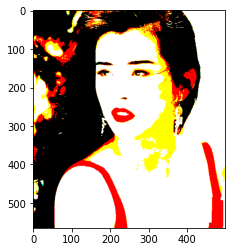

In [6]:
wzx = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wzx.jpg")
t,dst = cv2.threshold(wzx,127,255,cv2.THRESH_BINARY)
img_show(dst)

### 6.1.2 反二值化阈值处理（cv2.THRESH_BINARY_INV）

In [7]:
# 对于大于阈值的像素置为0，小于阈值的像素置为255
# dst(x,y) = 0  # src(x,y)>thresh
# dst(x,y) = maxval  # 其他情况

In [8]:
img = np.random.randint(0,255,size=[4,5],dtype=np.uint8)
t,dst = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
print("img\n",img)
print("dst\n",dst)

img
 [[166 170 141 240  84]
 [126  45  25 178 237]
 [ 43 127 223 108  68]
 [159 132  97 142 239]]
dst
 [[  0   0   0   0 255]
 [255 255 255   0   0]
 [255 255   0 255 255]
 [  0   0 255   0   0]]


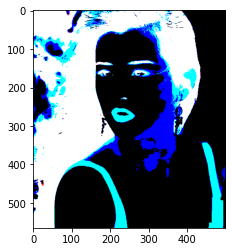

In [9]:
wzx = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wzx.jpg")
t,dst = cv2.threshold(wzx,127,255,cv2.THRESH_BINARY_INV)
img_show(dst)

### 6.1.4 超阈值0处理 cv2.THRESH_TOZERO_INV

In [10]:
# 大于阈值的像素点置为0，小于等于阈值的不变
# dst(x,y) = 0  # src(x,y)>thresh
# dst(x,y) = src(x,y)  # 其他情况

In [11]:
img = np.random.randint(0,255,size=[4,5],dtype=np.uint8)
t,dst = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
print("img\n",img)
print("dst\n",dst)

img
 [[173   5 220 226 254]
 [118   9 121  41  74]
 [ 72  81 169 234 195]
 [130  16 230 158  82]]
dst
 [[  0   5   0   0   0]
 [118   9 121  41  74]
 [ 72  81   0   0   0]
 [  0  16   0   0  82]]


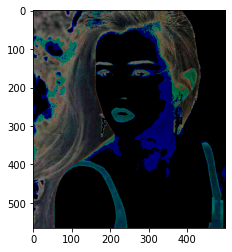

In [12]:
wzx = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wzx.jpg")
t,dst = cv2.threshold(wzx,127,255,cv2.THRESH_TOZERO_INV)
img_show(dst)

### 低阈值0处理 cv2.THRESH_TOZERO

In [13]:
# 小于阈值的像素点置为0，大于等于阈值的不变
# dst(x,y) = 0  # src(x,y)<thresh
# dst(x,y) = src(x,y)  # 其他情况

In [14]:
img = np.random.randint(0,255,size=[4,5],dtype=np.uint8)
t,dst = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
print("img\n",img)
print("dst\n",dst)

img
 [[ 13  63 155 137  23]
 [181   1 178 216  14]
 [231  56  53  73  16]
 [121  20 134 187  64]]
dst
 [[  0   0 155 137   0]
 [181   0 178 216   0]
 [231   0   0   0   0]
 [  0   0 134 187   0]]


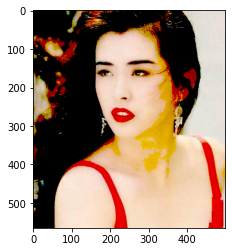

In [15]:
wzx = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wzx.jpg")
t,dst = cv2.threshold(wzx,127,255,cv2.THRESH_TOZERO)
img_show(dst)

# 6.2 自适应阈值处理

In [19]:
# 对于色彩均衡的图像，使用一个阈值就可以完成图像的阈值化处理，但有的图像色彩不均匀，使用变化阈值完成对图像的阈值化处理
# 自适应阈值处理方法通过计算每个像素点周围临近区域的加权平均获取阈值，并使用该阈值对当前像素点进行处理

# opencv提供函数cv2.adaptiveThreshold()来实现自适应阈值处理：
# dst = cv2.adaptiveThreshold(src,maxValue,adaptiveMethod,thresholdType,blockSize,C)
# dst：自适应阈值处理结果
# src：原始图像，注意：必须是8位单通道图像
# maxValue：最大值
# adaptiveMethod：自适应方法
# thresholdType：阈值处理方式，必须是cv2.THRESH_BINARY或cv2.THRESH_BINARY_INV中的一个
# blockSize：块大小，一个像素在计算其阈值时所使用的临近尺寸，通常位3，5，7
# C：常量

# 函数cv2.adaptiveThreshold()根据参数adaptMethod来确定自适应阈值的计算方法，有两种：
# 1.cv2.ADAPTIVE_THRESH_MEAN_C：邻域所有像素点的权重都一样
# 2.cv2.ADAPTIVE_THRESH_GAUSSIAN_C：与邻域各像素点到中心的距离有关，通过高斯方程得到各个点的权重值

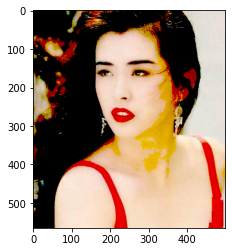

In [26]:
# 对一幅图像别使用二值阈值函数和自适应阈值函数进行处理，观察结果
# cv2.threshod()
wzx = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wzx.jpg")
t,dst = cv2.threshold(wzx,127,255,cv2.THRESH_TOZERO)
img_show(dst)

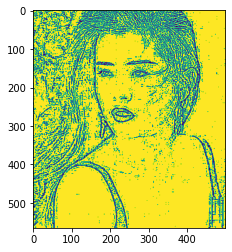

In [28]:
# cv2.adaptiveThreshod()
wzx = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wzx.jpg",0)  # 注意：必须是8位单通道
dst = cv2.adaptiveThreshold(wzx,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,5,3)  # 注意：必须二选一，cv2.THRESH_BINARY
img_show(dst)

# 6.3 Otsu处理

In [30]:
# cv2.threshold()需要设定一个阈值，这个阈值合适与否不能一眼看出
# Otsu方法能根据当前图像给出最佳的累间分割阈值，Otsu方法回比那里所有可能的阈值，找到最佳的阈值

# opencv中通过函数cv2.threshold()中对参数type的类型多传一个参数“cv2.THRESH_OTSU”,即可实现Otsu方式的阈值分割
# t,otsu = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# 与普通阈值分割不同在于：
# 1.type增加了一个参数值cv2.THRESH_OTSU
# 2.设定阈值为0
# 3.返回值t是Otsu计算得到并使用的最优阈值

In [32]:
img = np.zeros([5,5],dtype=np.uint8)
img[0:6,0:6] = 123
img[2:6,2:6] = 126
t,otsu = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print("img\n",img)
print("otsu\n",otsu)
print("t\n",t)

img
 [[123 123 123 123 123]
 [123 123 123 123 123]
 [123 123 126 126 126]
 [123 123 126 126 126]
 [123 123 126 126 126]]
otsu
 [[  0   0   0   0   0]
 [  0   0   0   0   0]
 [  0   0 255 255 255]
 [  0   0 255 255 255]
 [  0   0 255 255 255]]
t
 123.0


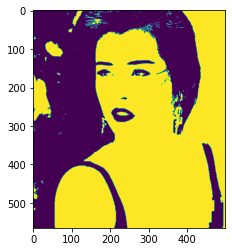

In [37]:
wzx = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wzx.jpg",0)  # 必须8位单通道
t,dst = cv2.threshold(wzx,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU) 
img_show(dst)